# JUPYTER NOTEBOOK FOR HOMEWORK 3
Using classifiers to identify very noisy images of faces with happy or sad expressions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#from helper import getBinaryfer13Data, sigmoid, sigmoid_cost, error_rate
from helper import y2indicator, getBinaryfer13Data, sigmoid, sigmoid_cost, error_rate, init_weight_and_bias, \
                    init_weight_and_bias_NN, ReLU, softmax, cost



# PART 1 - Logistic regressor

In [8]:

#Implement a logistic regression class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class LRClass(object):
    def __init__(self):
        self.W = None
        self.b = 0

    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape
        
        
        
        #(i) Initialize the weights W to small random numbers (variance - zero); 
        #       also initialize the bias b to zero
        #ADD CODE HERE...
        self.W,self.b=init_weight_and_bias(D,1)

        #For the given number of epochs selected, learn the weights 
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        
        #(ii) Create a loop over the number of epochs specified. 
        for i in range(epochs):
                #(iii) Call the forward funcion to calculate P(Y|X)
                #ADD CODE HERE...
                pY=self.forward(X)
                
                #(iv) Next, learn the weights via back-propagation, by performing 
                #   gradient descent using equations (1) and (2) from the HW text
                #ADD CODE HERE...
                self.W-=step_size*np.dot(X.T,(pY-Y))
                self.b-=step_size*np.sum((pY-Y))

                #(v) Using both the training and validation data, compute P(Y|X) using the 
                #       forward algo. Compute the sigmoid costs and append to array costs
                #       Check to set best_validation_error 
                #ADD CODE HERE...
                trainDataY=self.forward(X)
                validDataY=self.forward(Xvalid)
                
                trainCost=sigmoid_cost(Y,trainDataY)/len(Y)
                validCost=sigmoid_cost(Yvalid,validDataY)/len(Yvalid)
                
                train_costs.append(trainCost)
                valid_costs.append(validCost)
                
                error=error_rate(np.round(validDataY),Yvalid)
                if error<best_validation_error:
                    best_validation_error=error
                
                
                
        #(vi) Print your best validation error here
        print("best_validation_error:", best_validation_error)
        
        #(vii) Display the graph of the validation cost in your final report
        #ADD CODE HERE...
        plt.plot(train_costs,'b-',label='Training costs')
        plt.plot(valid_costs,'g-',label='Validation costs')
        plt.title("Graph of costs")
        plt.legend()
        plt.show()
        
        
        print("Final train classification_rate:",self.score(Y,self.predict(X)))
        print("Final validation classification_rate:",self.score(Yvalid,self.predict(Xvalid)))
    
    # Implement the forward algorithm
    def forward(self, X):
        #ADD CODE HERE...
        return sigmoid(np.dot(X,self.W)+self.b)
        
    
    # Implement the prediction algorithm, calling forward
    def predict(self, X):
        #ADD CODE HERE...
        return np.round(self.forward(X))
    
    # Implement a method to compute accuracy or classification rate
    def score(self, X, Y):
        #ADD CODE HERE...
        return np.mean(X==Y)

best_validation_error: 0.316


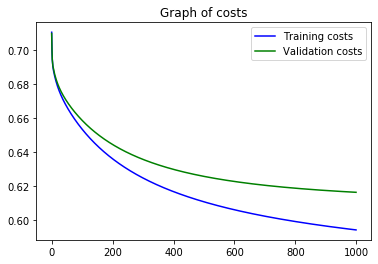

Final train classification_rate: 0.6983553226097958
Final validation classification_rate: 0.682
Accuracy of test set is: 0.7096666666666667


In [9]:
#Call your logistic regression class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
lrObj = LRClass()
lrObj.train(X, Y, epochs = 1000)

#(viii) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
res=lrObj.score(lrObj.predict(testX),testY)
print("Accuracy of test set is: "+str(res))


# PART 2 - Neural Network (1-layer)

In [6]:
#Implement a neural network class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class NNClass(object):
    def __init__(self):
        pass
    
    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]   
        K = len(set(Y))    #number of categories
        
        # Convert outputs of the NN to an indicator matrix
        Ytrain_ind = y2indicator(Y, K)
        Yvalid_ind = y2indicator(Yvalid, K)
        M, D = X.shape
       

        #(i) Randomly initialize all the hidden weights W's and biases b's 
        #ADD CODE HERE...
        numofHiddenLayer=200
        self.W1,self.b1=init_weight_and_bias_NN(D,numofHiddenLayer)
        self.W2,self.b2=init_weight_and_bias_NN(numofHiddenLayer,K)
        
        #(ii) For the given number of epochs set, implement backpropagation to learn the
        #       weights and append computed costs in the 2 cost arrays
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        for i in range(epochs):
                #(iii) Call forward propagation twice; once to calculate P(Ytrain|X) 
                #       and Ztrain (activations at hidden layer); second to calculate
                #       P(Yvalid|Xvalid) and Zvalid
                #ADD CODE HERE...
                Ztrain,Ytrain=self.forward(X)
                Zvalid,pYvalid=self.forward(Xvalid)

                #(iv) Now we do a first round of back propagation by first performing 
                #       gradient descent using equations (3) and (4) from the HW text
                #ADD CODE HERE...
                self.W2-=step_size*np.dot(Ztrain.T,(Ytrain-Ytrain_ind))
                self.b2-=step_size*(Ytrain-Ytrain_ind).sum(axis=0)
                                
            
                #(v) Then we propagate the errors we got from the previous layer W2 update W1 and b1
                #ADD CODE HERE...
                dZ=np.dot(Ytrain-Ytrain_ind,self.W2.T)*(1-Ztrain*Ztrain)
                self.W1-=step_size*np.dot(X.T,dZ)
                self.b1-=step_size*dZ.sum(axis=0)

  
                #(vi) Compute the training and validation errors using cross_entropy cost
                #       function; once on the training predictions and once on validation predictions
                #       append errors to appropriate error array 
                #ADD CODE HERE...
                trainCost=self.cross_entropy(Ytrain_ind,Ytrain)
                validCost=self.cross_entropy(Yvalid_ind,pYvalid)

                train_costs.append(trainCost)
                valid_costs.append(validCost)

                e=error_rate(Yvalid,self.predict(Xvalid))
                if e<best_validation_error:
                    best_validation_error=e
                
                         
        #(vii) Print out the best validation error and training and validation classification rates
        #ADD CODE HERE...
        print("Final train classification_rate:",self.classification_rate(Y,self.predict(X)))
        print("Final validation classification_rate:",self.classification_rate(Yvalid,self.predict(Xvalid)))
        

        #(viii) Display the training and validation cost graphs 
        #ADD CODE HERE...
        plt.plot(train_costs,'b-',label='Training costs')
        plt.plot(valid_costs,'g-',label='Validation costs')
        plt.title("Graph of costs")
        plt.legend()
        plt.show()

    # Implement the forward algorithm
    def forward(self, X):
        #ADD CODE HERE...
        mid=np.tanh(np.dot(X,self.W1)+self.b1)
        return mid,softmax(np.dot(mid,self.W2)+self.b2)

    # Implement the prediction algorithm
    def predict(self, X):
        #ADD CODE HERE...
        P_Y_given_X=self.forward(X)
        return np.argmax(P_Y_given_X[1],axis=1)
        
    # Implement a method to compute accuracy or classification rate
    def classification_rate(self, Y, P):
        #ADD CODE HERE...
        return np.mean(Y==P)
                    
    def cross_entropy(self, T, pY):
        #ADD CODE HERE...
        return cost(T,pY)/T.shape[0]/T.shape[1]


Final train classification_rate: 0.7026929333092355
Final validation classification_rate: 0.693


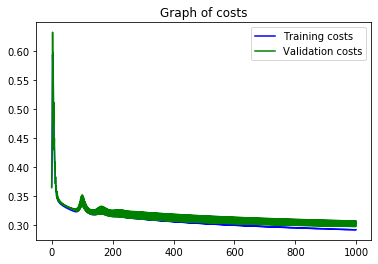

Accuracy of test set is :0.673


In [7]:
#Call your neural network class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
nnObj = NNClass()
nnObj.train(X, Y, epochs = 1000)

#(ix) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
res=nnObj.classification_rate(testY,nnObj.predict(testX))
print("Accuracy of test set is :"+str(res))


# PART 3 - Neural Network (1-layer) with ReLU

In [10]:
#Implement a neural network class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class NNClass(object):
    def __init__(self):
        pass
    
    
    def reluDerivative(self,x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]   
        K = len(set(Y))    #number of categories
        
        # Convert outputs of the NN to an indicator matrix
        Ytrain_ind = y2indicator(Y, K)
        Yvalid_ind = y2indicator(Yvalid, K)
        M, D = X.shape
       

        #(i) Randomly initialize all the hidden weights W's and biases b's 
        #ADD CODE HERE...
        numofHiddenLayer=200
        self.W1,self.b1=init_weight_and_bias_NN(D,numofHiddenLayer)
        self.W2,self.b2=init_weight_and_bias_NN(numofHiddenLayer,K)
        
        #(ii) For the given number of epochs set, implement backpropagation to learn the
        #       weights and append computed costs in the 2 cost arrays
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        for i in range(epochs):
                #(iii) Call forward propagation twice; once to calculate P(Ytrain|X) 
                #       and Ztrain (activations at hidden layer); second to calculate
                #       P(Yvalid|Xvalid) and Zvalid
                #ADD CODE HERE...
                Ztrain,Ytrain=self.forward(X)
                Zvalid,pYvalid=self.forward(Xvalid)

                #(iv) Now we do a first round of back propagation by first performing 
                #       gradient descent using equations (3) and (4) from the HW text
                #ADD CODE HERE...
                self.W2-=step_size*np.dot(Ztrain.T,(Ytrain-Ytrain_ind))
                self.b2-=step_size*(Ytrain-Ytrain_ind).sum(axis=0)
                                
            
                #(v) Then we propagate the errors we got from the previous layer W2 update W1 and b1
                #ADD CODE HERE...
                raw=np.dot(X,self.W1)+self.b1
                ReLU=self.reluDerivative(raw)
        
                dZ=np.dot(Ytrain-Ytrain_ind,self.W2.T)*ReLU
                self.W1-=step_size*np.dot(X.T,dZ)
                self.b1-=step_size*dZ.sum(axis=0)

  
                #(vi) Compute the training and validation errors using cross_entropy cost
                #       function; once on the training predictions and once on validation predictions
                #       append errors to appropriate error array 
                #ADD CODE HERE...
                trainCost=self.cross_entropy(Ytrain_ind,Ytrain)
                validCost=self.cross_entropy(Yvalid_ind,pYvalid)

                train_costs.append(trainCost)
                valid_costs.append(validCost)

                e=error_rate(Yvalid,self.predict(Xvalid))
                if e<best_validation_error:
                    best_validation_error=e
                
                                   
        #(vii) Print out the best validation error and training and validation classification rates
        #ADD CODE HERE...
        print("Final train classification_rate:",self.classification_rate(Y,self.predict(X)))
        print("Final validation classification_rate:",self.classification_rate(Yvalid,self.predict(Xvalid)))
        

        #(viii) Display the training and validation cost graphs 
        #ADD CODE HERE...
        plt.plot(train_costs,'b-',label='Training costs')
        plt.plot(valid_costs,'g-',label='Validation costs')
        plt.title("Graph of costs")
        plt.legend()
        plt.show()
  

    # Implement the forward algorithm
    def forward(self, X):
        #ADD CODE HERE...
        mid=ReLU(np.dot(X,self.W1)+self.b1)
        return mid,softmax(np.dot(mid,self.W2)+self.b2)

    # Implement the prediction algorithm
    def predict(self, X):
        #ADD CODE HERE...
        P_Y_given_X=self.forward(X)
        return np.argmax(P_Y_given_X[1],axis=1)
        
        
    # Implement a method to compute accuracy or classification rate
    def classification_rate(self, Y, P):
        #ADD CODE HERE...
        return np.mean(Y==P)
                    
    def cross_entropy(self, T, pY):
        #ADD CODE HERE...
        return cost(T,pY)/T.shape[0]/T.shape[1]


Final train classification_rate: 0.6826314838243268
Final validation classification_rate: 0.699


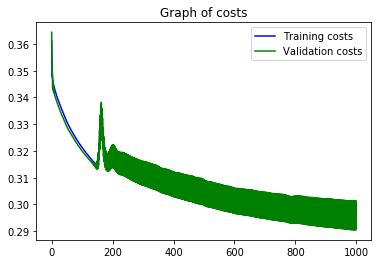

Accuracy of test set is :0.718


In [12]:
#Call your neural network class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
nnObj = NNClass()
nnObj.train(X, Y, epochs = 1000)

#(ix) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
res=nnObj.classification_rate(testY,nnObj.predict(testX))
print("Accuracy of test set is :"+str(res))


# PART 4 - Neural Network (1-layer) with Sigmoid

In [13]:
#Implement a neural network class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class NNClass(object):
    def __init__(self):
        pass
    
    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]   
        K = len(set(Y))    #number of categories
        
        # Convert outputs of the NN to an indicator matrix
        Ytrain_ind = y2indicator(Y, K)
        Yvalid_ind = y2indicator(Yvalid, K)
        M, D = X.shape
       

        #(i) Randomly initialize all the hidden weights W's and biases b's 
        #ADD CODE HERE...
        numofHiddenLayer=200
        self.W1,self.b1=init_weight_and_bias_NN(D,numofHiddenLayer)
        self.W2,self.b2=init_weight_and_bias_NN(numofHiddenLayer,K)
        
        #(ii) For the given number of epochs set, implement backpropagation to learn the
        #       weights and append computed costs in the 2 cost arrays
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        for i in range(epochs):
                #(iii) Call forward propagation twice; once to calculate P(Ytrain|X) 
                #       and Ztrain (activations at hidden layer); second to calculate
                #       P(Yvalid|Xvalid) and Zvalid
                #ADD CODE HERE...
                Ztrain,Ytrain=self.forward(X)
                Zvalid,pYvalid=self.forward(Xvalid)

                #(iv) Now we do a first round of back propagation by first performing 
                #       gradient descent using equations (3) and (4) from the HW text
                #ADD CODE HERE...
                self.W2-=step_size*np.dot(Ztrain.T,(Ytrain-Ytrain_ind))
                self.b2-=step_size*(Ytrain-Ytrain_ind).sum(axis=0)
                                
            
                #(v) Then we propagate the errors we got from the previous layer W2 update W1 and b1
                #ADD CODE HERE...
                dZ=np.dot(Ytrain-Ytrain_ind,self.W2.T)*Ztrain*(1-Ztrain)
                self.W1-=step_size*np.dot(X.T,dZ)
                self.b1-=step_size*dZ.sum(axis=0)

  
                #(vi) Compute the training and validation errors using cross_entropy cost
                #       function; once on the training predictions and once on validation predictions
                #       append errors to appropriate error array 
                #ADD CODE HERE...
                trainCost=self.cross_entropy(Ytrain_ind,Ytrain)
                validCost=self.cross_entropy(Yvalid_ind,pYvalid)

                train_costs.append(trainCost)
                valid_costs.append(validCost)

                e=error_rate(Yvalid,self.predict(Xvalid))
                if e<best_validation_error:
                    best_validation_error=e
                
                         
        #(vii) Print out the best validation error and training and validation classification rates
        #ADD CODE HERE...
        print("Final train classification_rate:",self.classification_rate(Y,self.predict(X)))
        print("Final validation classification_rate:",self.classification_rate(Yvalid,self.predict(Xvalid)))
        

        #(viii) Display the training and validation cost graphs 
        #ADD CODE HERE...
        plt.plot(train_costs,'b-',label='Training costs')
        plt.plot(valid_costs,'g-',label='Validation costs')
        plt.title("Graph of costs")
        plt.legend()
        plt.show()

    # Implement the forward algorithm
    def forward(self, X):
        #ADD CODE HERE...
        mid=sigmoid(np.dot(X,self.W1)+self.b1)
        return mid,softmax(np.dot(mid,self.W2)+self.b2)

    # Implement the prediction algorithm
    def predict(self, X):
        #ADD CODE HERE...
        P_Y_given_X=self.forward(X)
        return np.argmax(P_Y_given_X[1],axis=1)
        
    # Implement a method to compute accuracy or classification rate
    def classification_rate(self, Y, P):
        #ADD CODE HERE...
        return np.mean(Y==P)
                    
    def cross_entropy(self, T, pY):
        #ADD CODE HERE...
        return cost(T,pY)/T.shape[0]/T.shape[1]


Final train classification_rate: 0.6565154527381167
Final validation classification_rate: 0.652


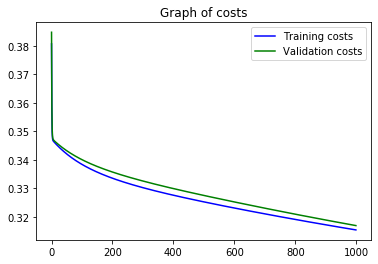

Accuracy of test set is :0.6603333333333333


In [15]:
#Call your neural network class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
nnObj = NNClass()
nnObj.train(X, Y, epochs = 1000)

#(ix) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
res=nnObj.classification_rate(testY,nnObj.predict(testX))
print("Accuracy of test set is :"+str(res))


# PART 5 - Neural Network (1-layer) with Regularizer

In [16]:
#Implement a neural network class to read in vectorized 48 x 48 images;
#  so that the dimension of the input is 2304.
#  The class includes function train (weight learning), forward (forward activations), 
#  predict (using current weight to make predictions) and score (or accuracy based on targets and predictions)
class NNClass(object):
    def __init__(self):
        pass
    
    def train(self, X, Y, step_size=10e-7, epochs=10000):
        # Validation data set extracted from the training data
        X, Y = shuffle(X, Y)
        Xvalid, Yvalid = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]   
        K = len(set(Y))    #number of categories
        
        # Convert outputs of the NN to an indicator matrix
        Ytrain_ind = y2indicator(Y, K)
        Yvalid_ind = y2indicator(Yvalid, K)
        M, D = X.shape
       

        #(i) Randomly initialize all the hidden weights W's and biases b's 
        #ADD CODE HERE...
        numofHiddenLayer=200
        self.W1,self.b1=init_weight_and_bias_NN(D,numofHiddenLayer)
        self.W2,self.b2=init_weight_and_bias_NN(numofHiddenLayer,K)
        
        #(ii) For the given number of epochs set, implement backpropagation to learn the
        #       weights and append computed costs in the 2 cost arrays
        train_costs = []
        valid_costs = []
        best_validation_error = 1
        for i in range(epochs):
                #(iii) Call forward propagation twice; once to calculate P(Ytrain|X) 
                #       and Ztrain (activations at hidden layer); second to calculate
                #       P(Yvalid|Xvalid) and Zvalid
                #ADD CODE HERE...
                Ztrain,Ytrain=self.forward(X)
                Zvalid,pYvalid=self.forward(Xvalid)

                #(iv) Now we do a first round of back propagation by first performing 
                #       gradient descent using equations (3) and (4) from the HW text
                #ADD CODE HERE...
                self.W2-=step_size*(np.dot(Ztrain.T,(Ytrain-Ytrain_ind))+self.W2)
                self.b2-=step_size*(Ytrain-Ytrain_ind).sum(axis=0)
                                
            
                #(v) Then we propagate the errors we got from the previous layer W2 update W1 and b1
                #ADD CODE HERE...
                dZ=np.dot(Ytrain-Ytrain_ind,self.W2.T)*(1-Ztrain*Ztrain)
                self.W1-=step_size*(np.dot(X.T,dZ)+self.W1)
                self.b1-=step_size*dZ.sum(axis=0)

  
                #(vi) Compute the training and validation errors using cross_entropy cost
                #       function; once on the training predictions and once on validation predictions
                #       append errors to appropriate error array 
                #ADD CODE HERE...
                trainCost=self.cross_entropy(Ytrain_ind,Ytrain)
                validCost=self.cross_entropy(Yvalid_ind,pYvalid)

                train_costs.append(trainCost)
                valid_costs.append(validCost)

                e=error_rate(Yvalid,self.predict(Xvalid))
                if e<best_validation_error:
                    best_validation_error=e
                
                
            
                                
        #(vii) Print out the best validation error and training and validation classification rates
        #ADD CODE HERE...
        print("Final train classification_rate:",self.classification_rate(Y,self.predict(X)))
        print("Final validation classification_rate:",self.classification_rate(Yvalid,self.predict(Xvalid)))
        

        #(viii) Display the training and validation cost graphs 
        #ADD CODE HERE...
        plt.plot(train_costs,'b-',label='Training costs')
        plt.plot(valid_costs,'g-',label='Validation costs')
        plt.title("Graph of costs")
        plt.legend()
        plt.show()
  

    # Implement the forward algorithm
    def forward(self, X):
        #ADD CODE HERE...
        mid=np.tanh(np.dot(X,self.W1)+self.b1)
        return mid,softmax(np.dot(mid,self.W2)+self.b2)

    # Implement the prediction algorithm
    def predict(self, X):
        #ADD CODE HERE...
        P_Y_given_X=self.forward(X)
        return np.argmax(P_Y_given_X[1],axis=1)
        
    # Implement a method to compute accuracy or classification rate
    def classification_rate(self, Y, P):
        #ADD CODE HERE...
        return np.mean(Y==P)
                    
    def cross_entropy(self, T, pY):
        #ADD CODE HERE...
        return cost(T,pY)/T.shape[0]/T.shape[1]


Final train classification_rate: 0.7035966022049521
Final validation classification_rate: 0.703


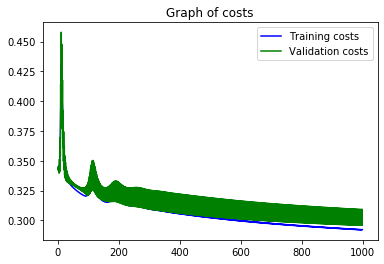

Accuracy of test set is :0.6796666666666666


In [17]:
#Call your neural network class and train your object
X, Y = getBinaryfer13Data('fer3and4train.csv')
nnObj = NNClass()
nnObj.train(X, Y, epochs = 1000)

#(ix) After successfully training, apply the learned model on the test dataset
testX, testY = getBinaryfer13Data('fer3and4test.csv')
res=nnObj.classification_rate(testY,nnObj.predict(testX))
print("Accuracy of test set is :"+str(res))

# PART 6 - SVM Classification

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Train the SVM
X, Y = getBinaryfer13Data('fer3and4train.csv')
#ADD CODE HERE...
linear_svm=SVC(kernel='linear')
rbf_svm=SVC(kernel='rbf',gamma='scale')
poly_svm_degree3=SVC(kernel='poly',degree=3)
poly_svm_degree5=SVC(kernel='poly',degree=5)
poly_svm_degree7=SVC(kernel='poly',degree=7)



linear_svm.fit(X,Y)
rbf_svm.fit(X,Y)
poly_svm_degree3.fit(X,Y)
poly_svm_degree5.fit(X,Y)
poly_svm_degree7.fit(X,Y)


#Test the SVM
#ADD CODE HERE...
testX,testY=getBinaryfer13Data('fer3and4train.csv')


linear_predY=linear_svm.predict(testX)
rbf_predY=rbf_svm.predict(testX)
poly_predY_degree3=poly_svm_degree3.predict(testX)
poly_predY_degree5=poly_svm_degree5.predict(testX)
poly_predY_degree7=poly_svm_degree7.predict(testX)


#Report overall the accuracy from the results of the different SVM kernels
print("linear kernel ---------")
print(confusion_matrix(testY, linear_predY))
print(classification_report(testY, linear_predY))
print("rbf kernel ---------")
print(confusion_matrix(testY, rbf_predY))
print(classification_report(testY, rbf_predY))
print("polynomial kernel degree=3---------")
print(confusion_matrix(testY, poly_predY_degree3))
print(classification_report(testY, poly_predY_degree3))
print("polynomial kernel degree=5---------")
print(confusion_matrix(testY, poly_predY_degree5))
print(classification_report(testY, poly_predY_degree5))
print("polynomial kernel degree=7---------")
print(confusion_matrix(testY, poly_predY_degree7))
print(classification_report(testY, poly_predY_degree7))

C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


linear kernel ---------
[[5033 1007]
 [1230 4796]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      6040
           1       0.83      0.80      0.81      6026

    accuracy                           0.81     12066
   macro avg       0.82      0.81      0.81     12066
weighted avg       0.82      0.81      0.81     12066

rbf kernel ---------
[[5445  595]
 [ 843 5183]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6040
           1       0.90      0.86      0.88      6026

    accuracy                           0.88     12066
   macro avg       0.88      0.88      0.88     12066
weighted avg       0.88      0.88      0.88     12066

polynomial kernel degree=3---------
[[4906 1134]
 [3330 2696]]
              precision    recall  f1-score   support

           0       0.60      0.81      0.69      6040
           1       0.70      0.45      0.55      6026

    accuracy        